## Apply 'Monte Carlo' to figure out probabilities of real problems.

#### Whats is the intuition behind probability

For the case where we are measuring the occurrence of one event A;

$P(A) = \frac{S}{T}$ 

where:

   P(A)=Probability of event A occuring

   S=Number of successes of Event A and 

   T = Number of tries.

> The event A could represent rolling dice with 5.
We can then roll the dice 1000 times and count the number of times it hit 5.
Then we divide the number of '5's by 1000 and get the probability.




**Note:** 

There are cases when the event is not discrete with a finite number of occurrences.

Example:
  What's the probability of a missile hitting a particular part of a vessel?
The same priciple applies by we need to look into areas instead of counts.


#### Monte Carlo Method

Monte Carlo simulations are used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.

A Monte Carlo simulation can be used to tackle a range of problems in virtually every field such as finance, engineering, supply chain, and science. It is also referred to as a multiple probability simulation.

-- Wikepedia --


#### Intuition:

> We create an experiment that replicates the problem using a software program.
Then we run that program(experiment) many times to calculate the number of successes and divide by the number of tries

## Scenario: Will Stephanie and Mia meet at Starbucks?

### Solution

In [1]:
import random
 

def two_people_meet(num_of_minutes, person_1_wait, person_2_wait):
    # Generate possible arrival times.
    arrival_minutes = []
    for i in range(1, num_of_minutes+1):
        arrival_minutes.append(i)
    # Randomise arrivals
    person_1_arrival = random.choice(arrival_minutes)
    person_2_arrival = random.choice(arrival_minutes)
    if person_1_arrival == person_2_arrival:
        return True
    elif person_1_arrival < person_2_arrival:
        return abs(person_2_arrival - person_1_arrival) <= person_1_wait
    else:
        return abs(person_1_arrival - person_2_arrival) <= person_2_wait
        

def monte_carlo_prob_meeting(num_of_experiments, num_of_minutes, person_1_wait, person_2_wait):
    meetings = 0.0
    for i in range(num_of_experiments):
        if two_people_meet(num_of_minutes, person_1_wait, person_2_wait):
            meetings +=1
    prob_meetings = (meetings / num_of_experiments) * 100
    return prob_meetings
   

### How increasing the number of tries changes the result?

In [4]:
random.seed(1)
experiment_sizes = [10_000, 100_000, 1_000_000, 10_000_000]
num_of_minutes = 30
person_1_wait = 8
person_2_wait = 5
for experiment_size in experiment_sizes:
    prob = monte_carlo_prob_meeting(experiment_size, num_of_minutes, person_1_wait, person_2_wait)
    print('Num. Experiments ={0:>9} -> {1:.2f}%'.format(experiment_size, prob))
print(' ')

Num. Experiments =    10000 -> 41.48%
Num. Experiments =   100000 -> 41.07%
Num. Experiments =  1000000 -> 41.05%
Num. Experiments = 10000000 -> 40.99%
 


### How changing the number of minutes waited changes the chances of meeting?

In [5]:
def estimate_probs_for_wait_times():
    num_of_minutes = 30
    exp_size = 1_000_000
    person_waits = list(range(0, 31))
    results = []             
    for wait_time in person_waits:
        prob = monte_carlo_prob_meeting(exp_size, num_of_minutes, wait_time, wait_time)
        results.append(prob)
    x = person_waits
    y = results
    return x, y

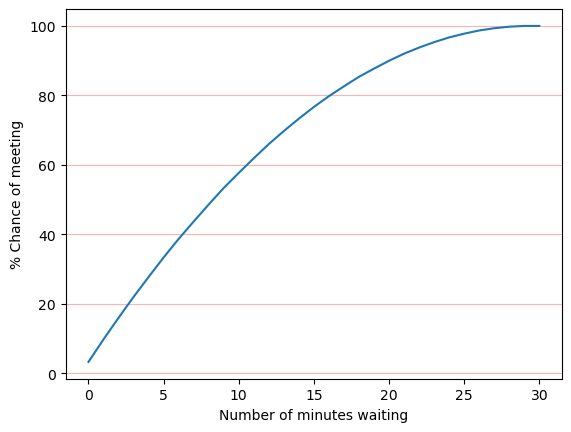

In [6]:
import matplotlib.pyplot as plt

x, y = estimate_probs_for_wait_times()
plt.plot(x, y)
plt.xlabel('Number of minutes waiting')
plt.ylabel('% Chance of meeting')
plt.grid(visible=True, which='major', axis='y', color='red', alpha=0.3)